
* experimento almenos dos variantes / experimentos no tengan mucho default/ no se asigno variante / cant defaults
* cuantos usuarios/ cadena de navegacion termino el dia siguiente

In [1]:
# Preparamos el entorno
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


import sys
import os
module_path = os.path.abspath(os.path.join('/Users/juanmanuelpaiba/Documents/Juan_Paiba/AB_Testing_Meli/', 'python_scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utilities

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', 1000)

In [2]:
url = "https://raw.githubusercontent.com/jmpaiba123/AB_Testing_Meli/main/data/Outputs/grouped_inf.csv"
df_results = pd.read_csv(url, sep=",")

print(df_results.shape)
df_results.head()

(143, 7)


,date,experiment,variant,participants,purchases,buy_rate,buy_rate_percent
0,2021-08-01,HideTransitionModal,6646,2,0,0.000000,0.00%
1,2021-08-01,HideTransitionModal,6647,3,0,0.000000,0.00%
2,2021-08-01,HideTransitionModal,6993,5,0,0.000000,0.00%
3,2021-08-01,HideTransitionModal,DEFAULT,12,0,0.000000,0.00%
4,2021-08-01,address_hub,3574,189,143,0.756614,75.66%


In [3]:
df_results.experiment.value_counts()

experiment
HideTransitionModal                           8
best-seller-aa-testing-fail-fast-edition      6
carousel-v2p-above-the-fold                   6
sort-by-ranking                               6
viewItemPageMigrationDesktopReviewsNoTabs     4
viewItemPageMigrationDesktopQuotableSRV       4
viewItemPageMigrationReturns                  4
viewItemPageMigrationDesktopHirableSRV        4
web-layout-default-res                        4
recommended-products                          4
showV2V3BoxMessages                           4
show-pads-search-list                         4
show-pads-global                              4
shippingCalculatorMigrationModalExperiment    4
seller-reputation-change                      4
search-pads-none-desktop-mla                  4
results-target-web-motors                     4
remove-ecn-tag                                4
sa-on-vip                                     4
checkOnBehavior                               4
back-filters                 

In [5]:
df_results["buy_rate"] = df_results["buy_rate"].apply(lambda x: round(x, 2))
total_participants_per_day = df_results.groupby(['date', 'experiment'])['participants'].sum().reset_index()
total_participants_per_day.columns = ['date', 'experiment', 'total_participants']

# Merge the total participants with the original dataframe
df_results = df_results.merge(total_participants_per_day, on=['date', 'experiment'])
df_results['participation_percent'] = (df_results['participants'] / df_results['total_participants']) * 100

In [9]:
df_results[df_results.experiment == 'seller-with-tooltip']

,date,experiment,variant,participants,purchases,buy_rate,buy_rate_percent,total_participants,participation_percent
44,2021-08-01,seller-with-tooltip,4692,1523,127,0.08,8.34%,1523,100.0
115,2021-08-02,seller-with-tooltip,4692,4897,543,0.11,11.09%,4897,100.0


      date      experiment variant participation_percent  participants buy_rate_percent  buy_rate
2021-08-01 official-stores  [4926]               [100.0]             7          [0.00%]      0.00
2021-08-02 official-stores  [4926]               [100.0]            31          [3.23%]      0.03

Population Stability Index (PSI) between first and second vectors: 0.0


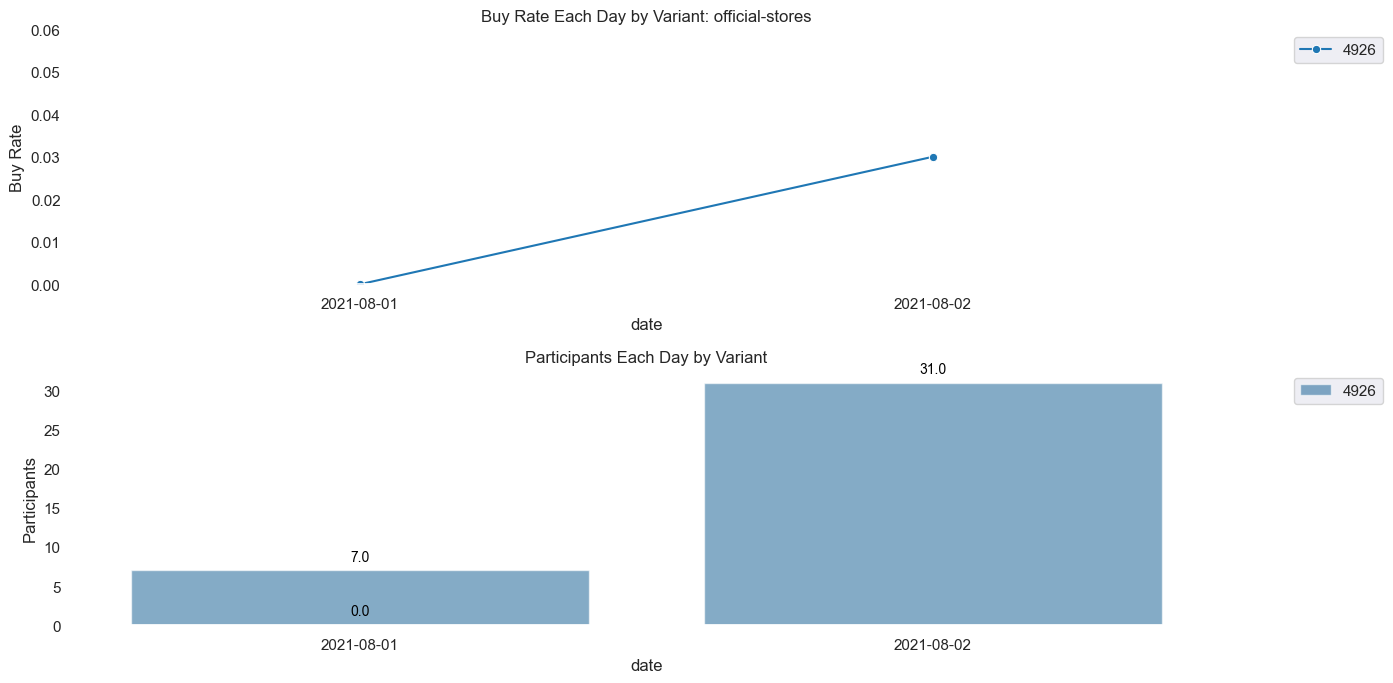

In [7]:
utilities.analisis_experimento(df= df_results,nombre_experimento='official-stores')

In [16]:
# Inatalamos el paquete que vamos a utilizar
#!pip install bayesian_testing

In [20]:
from bayesian_testing.experiments import BinaryDataTest
import numpy as np
import pandas as pd
from bayesian_testing.experiments import DiscreteDataTest

In [12]:
conv_test = BinaryDataTest()

In [46]:
np.random.default_rng(52)

values = [1,2,3,4,5,6]

In [47]:
die_A_rolls = list(np.random.choice(values, 1000, p=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]))
die_B_rolls = list(np.random.choice(values, 1200, p=[0.2, 0.2, 0.1, 0.1, 0.2, 0.2]))
die_C_rolls = list(np.random.choice(values, 500, p=[0.2, 0.1, 0.1, 0.2, 0.2, 0.2]))

In [48]:
discrete_test = DiscreteDataTest(values)

In [49]:
discrete_test.add_variant_data('A', die_A_rolls)
discrete_test.add_variant_data('B', die_B_rolls)
discrete_test.add_variant_data('C', die_C_rolls)

In [50]:
discrete_test.probabs_of_being_best(sim_count = 20000, seed=52)

{'A': 0.0912, 'B': 0.50275, 'C': 0.40605}

In [51]:
discrete_test.expected_loss(sim_count = 20000, seed=52)

{'A': 0.1005533, 'B': 0.0334918, 'C': 0.0485045}

In [54]:
results_ealuation = discrete_test.evaluate()
print(pd.DataFrame(results_ealuation).to_markdown(tablefmt="grid", index=False))

+-----------+--------------------------------------------------------------+-----------------+-------------------+-----------------+
| variant   | concentration                                                |   average_value |   prob_being_best |   expected_loss |
+===========+==============================================================+=================+===================+=================+
| A         | {1: 150.0, 2: 172.0, 3: 170.0, 4: 172.0, 5: 179.0, 6: 157.0} |         3.529   |           0.09275 |       0.101399  |
+-----------+--------------------------------------------------------------+-----------------+-------------------+-----------------+
| B         | {1: 205.0, 2: 244.0, 3: 121.0, 4: 138.0, 5: 244.0, 6: 248.0} |         3.59667 |           0.50215 |       0.03383   |
+-----------+--------------------------------------------------------------+-----------------+-------------------+-----------------+
| C         | {1: 100.0, 2: 55.0, 3: 68.0, 4: 100.0, 5: 85.0, 6: 92.0

In [53]:
pip install tabulate


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
